In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
#configurando para rodar em CPU
tf.config.set_visible_devices([],'GPU')

### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

# Classificação

#### 1. Aquisição dos dados

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

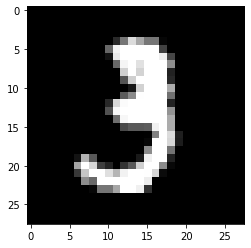

In [5]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

#### Normalização

In [6]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Particionamento de base de dados

In [10]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [11]:
from keras.layers import Dense, Activation, Dropout, Flatten,  Conv2D,MaxPool2D, Conv1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [12]:
rede_simples = Sequential()
rede_simples.add(Conv2D(filters=1,kernel_size=3,activation='relu',input_shape=[28,28,1]))
# rede_simples.add(MaxPool2D(pool_size=(2,2)))
rede_simples.add(Flatten())
rede_simples.add(Dense(25,activation='relu'))
rede_simples.add(Dense(10,activation='softmax'))

### 5. Definir otimizadores

In [13]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [14]:
x_treino = np.expand_dims(x_treino,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)

In [15]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 100, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 11s 6ms/step - loss: 0.6495 - accuracy: 0.7907 - val_loss: 0.3379 - val_accuracy: 0.9001
Epoch 2/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3106 - accuracy: 0.9061 - val_loss: 0.2875 - val_accuracy: 0.9120
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2807 - accuracy: 0.9150 - val_loss: 0.2765 - val_accuracy: 0.9131
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2627 - accuracy: 0.9199 - val_loss: 0.2592 - val_accuracy: 0.9230
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2474 - accuracy: 0.9246 - val_loss: 0.2445 - val_accuracy: 0.9250
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2332 - accuracy: 0.9277 - val_loss: 0.2369 - val_accuracy: 0.9288
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2229 - accuracy: 0.9321 - val_loss: 0.2274 - val_a

##### 7. Avaliação do modelo

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

x_test = np.expand_dims(x_test,axis=-1)
pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 1s 3ms/step


0.9399

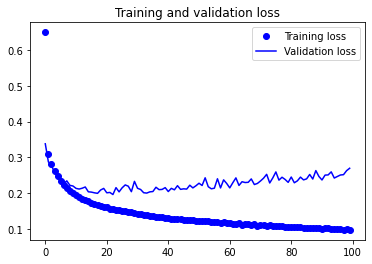

In [17]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [18]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0955 - accuracy: 0.9695 - val_loss: 0.2488 - val_accuracy: 0.9357
Epoch 2/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0970 - accuracy: 0.9691 - val_loss: 0.2616 - val_accuracy: 0.9343
Epoch 3/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0955 - accuracy: 0.9686 - val_loss: 0.2536 - val_accuracy: 0.9371
Epoch 4/150
 891/1500 [================>.............] - ETA: 2s - loss: 0.0991 - accuracy: 0.9677

KeyboardInterrupt: 

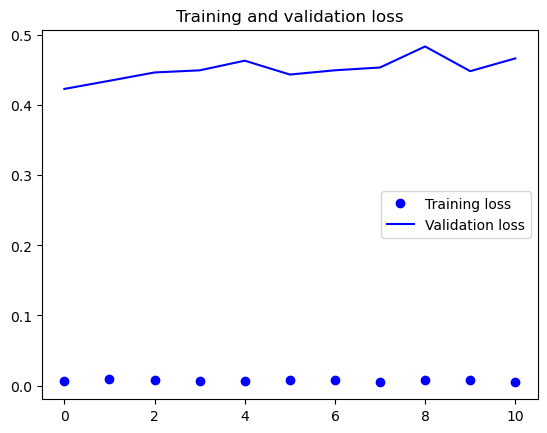

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.9596

In [ ]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[ 965,    0,    2,    2,    0,    0,    6,    1,    2,    2],
       [   0, 1113,    3,    2,    2,    0,    3,    3,    9,    0],
       [   3,    4,  970,   10,    7,    1,    4,   12,   19,    2],
       [   1,    2,    5,  961,    1,   15,    0,    8,   10,    7],
       [   1,    0,    3,    0,  949,    0,    4,    2,    1,   22],
       [   5,    0,    0,   23,    1,  828,   14,    3,   13,    5],
       [   3,    2,    1,    1,    8,    8,  933,    0,    1,    1],
       [   2,    5,   10,    3,    6,    0,    0,  979,    8,   15],
       [   8,    2,    1,   12,    6,    3,    2,    3,  927,   10],
       [   2,    2,    1,    6,   15,    2,    0,    7,    3,  971]])

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [ ]:
rede_dropout = Sequential()
rede_dropout.add(Conv2D(filters=1,kernel_size=3,activation='relu',input_shape=[28,28,1]))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(MaxPool2D(pool_size=(2,2)))
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,activation='relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(10,activation='softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [ ]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7437 - accuracy: 0.7596 - val_loss: 0.3507 - val_accuracy: 0.9137
Epoch 2/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4631 - accuracy: 0.8543 - val_loss: 0.3035 - val_accuracy: 0.9207
Epoch 3/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4184 - accuracy: 0.8685 - val_loss: 0.2817 - val_accuracy: 0.9283
Epoch 4/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4040 - accuracy: 0.8726 - val_loss: 0.2745 - val_accuracy: 0.9314
Epoch 5/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3874 - accuracy: 0.8769 - val_loss: 0.2489 - val_accuracy: 0.9342
Epoch 6/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3751 - accuracy: 0.8805 - val_loss: 0.2393 - val_accuracy: 0.9358
Epoch 7/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3658 - accuracy: 0.8845 - val_loss: 0.2369 - val_ac

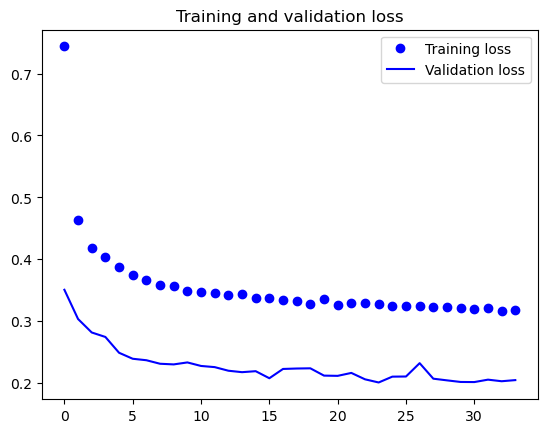

In [ ]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.951

In [ ]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[ 965,    0,    1,    1,    0,    2,    7,    2,    2,    0],
       [   0, 1116,    2,    2,    0,    1,    3,    0,   11,    0],
       [   6,    5,  975,    6,   11,    1,    5,    6,   17,    0],
       [   3,    1,    6,  948,    2,   13,    0,   11,   24,    2],
       [   1,    3,    2,    0,  948,    0,   11,    2,    1,   14],
       [  11,    0,    1,   15,    7,  812,   10,    3,   28,    5],
       [   7,    3,    0,    0,    5,    5,  935,    0,    3,    0],
       [   2,   10,   13,    5,    7,    0,    0,  966,    1,   24],
       [  15,    7,    4,    5,    7,    5,    8,    5,  912,    6],
       [   9,    5,    1,    7,   30,   10,    0,    7,    7,  933]])

# Regressão

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [ ]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [ ]:
model = Sequential()
model.add(Conv1D(3,1, activation='relu', input_shape=(len(x_train[1]),1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 3)             6         
                                                                 
 dense_4 (Dense)             (None, 13, 64)            256       
                                                                 
 dense_5 (Dense)             (None, 13, 1)             65        
                                                                 
Total params: 327 (1.28 KB)
Trainable params: 327 (1.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_treino = np.expand_dims(x_treino,axis=1)

In [ ]:
x_train = np.expand_dims(x_train,axis=-1)

In [ ]:
valid = (x_val,y_val)

In [ ]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
callbacks = [es]
historico = model.fit(x_train, 
                             y_train, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_split = 0.2 ,
                             shuffle=True,
                             callbacks = callbacks)

Epoch 1/150


6/6 [==============================] - 1s 35ms/step - loss: 562.8471 - mae: 21.8769 - val_loss: 631.0889 - val_mae: 23.3740
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 557.6104 - mae: 21.7556 - val_loss: 626.1984 - val_mae: 23.2674
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 553.0422 - mae: 21.6493 - val_loss: 622.0339 - val_mae: 23.1762
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 548.9990 - mae: 21.5537 - val_loss: 617.7330 - val_mae: 23.0814
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 544.8366 - mae: 21.4559 - val_loss: 613.2219 - val_mae: 22.9813
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 540.4218 - mae: 21.3515 - val_loss: 608.5209 - val_mae: 22.8764
Epoch 7/150
6/6 [==============================] - 0s 6ms/step - loss: 535.8856 - mae: 21.2428 - val_loss: 604.1276 - val_mae: 22.7777
Epoch 8/150
6/6 [==============================] - 0s 6ms/step - l

In [ ]:
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
x_test.shape

(102, 13, 1)

In [ ]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, np.mean(pred_simples,axis=1))

6.405823135375977

In [ ]:
import pandas as pd

resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = np.mean(pred_simples,axis=1)

resultado

,y_test,y_pred
0,7.2,22.031139
1,18.8,21.085009
2,19.0,21.170500
3,27.0,22.102200
4,22.2,21.267979
...,...,...
97,21.9,22.374277
98,24.1,21.735363
99,50.0,22.406820
100,26.7,21.768974
